In [ ]:
# 폰트 설치
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [ ]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

gdp_list = pd.read_excel('/content/세계GDP지표.xls')
plus_list = pd.read_excel('/content/관광수입.xls')
minus_list = pd.read_excel('/content/관광지출.xls')

#비어있는값 채우기
def fill(df):
  for i in range(df.shape[0]):
    for j in range(df.shape[1]):
      if(df.iloc[i,j]==0):
        df.iloc[i,j]=df.iloc[i,:].mean()

#인덱스를 국가로 변경
def sindex(df):
  df.set_index('국가',inplace=True)

gdp_list.dropna(axis=0, thresh=2, inplace=True) #대륙 제거
gdp_list['국가']=gdp_list['국가'].str.strip() #공백 제거

sindex(gdp_list)
sindex(plus_list)
sindex(minus_list)

gdp_list.replace('-',0,inplace=True)
fill(gdp_list)
fill(plus_list)
fill(minus_list)

<ipython-input-18-7bbe5c9f28e6>:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gdp_list.replace('-',0,inplace=True)


[Text(0.5, 0, '년도'), Text(0, 0.5, '관광수지'), Text(0.5, 1.0, '관광수지 비교')]

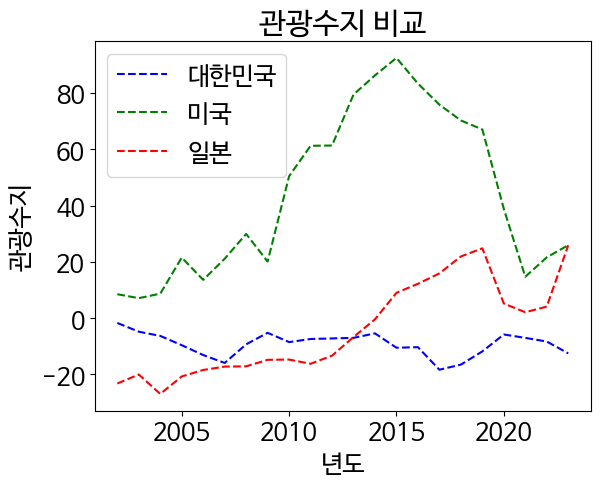

In [ ]:
#관광수지 비교 시각화
pm = [0 for i in range(gdp_list.shape[1])]

pm=plus_list.loc['대한민국']-minus_list.loc['대한민국']
pm_line=sns.lineplot(x=pm.index,y=pm,color='b',linestyle='--',label='대한민국')

pm=plus_list.loc['미국']-minus_list.loc['미국']
pm_line=sns.lineplot(x=pm.index,y=pm,color='g',linestyle='--',label='미국')

pm=plus_list.loc['일본']-minus_list.loc['일본']
pm_line=sns.lineplot(x=pm.index,y=pm,color='r',linestyle='--',label='일본')
pm_line.set(xlabel='년도', ylabel='관광수지',title='관광수지 비교')


[Text(0.5, 0, '년도'), Text(0, 0.5, '관광수지'), Text(0.5, 1.0, '관광수지 비교')]

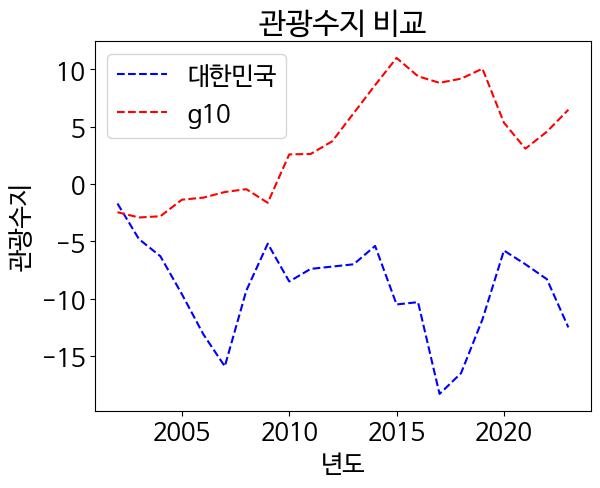

In [ ]:

pm=plus_list.loc['대한민국']-minus_list.loc['대한민국']
pm_line=sns.lineplot(x=pm.index,y=pm,color='b',linestyle='--',label='대한민국')

pm = plus_list.loc['미국']-minus_list.loc['미국']
pm += plus_list.loc['일본']-minus_list.loc['일본']
pm += plus_list.loc['프랑스']-minus_list.loc['프랑스']
pm += plus_list.loc['독일']-minus_list.loc['독일']
pm += plus_list.loc['이탈리아']-minus_list.loc['이탈리아']
pm += plus_list.loc['스웨덴']-minus_list.loc['스웨덴']
pm += plus_list.loc['벨기에']-minus_list.loc['벨기에']
pm += plus_list.loc['멕시코']-minus_list.loc['멕시코']
pm += plus_list.loc['튀르키예']-minus_list.loc['튀르키예']
pm += plus_list.loc['네덜란드']-minus_list.loc['네덜란드']
pm/=10

pm_line=sns.lineplot(x=pm.index,y=pm,color='r',linestyle='--',label='g10')
pm_line.set(xlabel='년도', ylabel='관광수지',title='관광수지 비교')



In [ ]:

#관광수지 데이터 구하기
pm=plus_list.loc['대한민국']-minus_list.loc['대한민국']
gdp=gdp_list.loc['대한민국']

#관광수지와 GDP시리즈 데이터프레임변환
df = pd.DataFrame({'pm':pm,'gdp':gdp})

print(df.corr()) #상관관계 분석

           pm       gdp
pm   1.000000 -0.456461
gdp -0.456461  1.000000


In [ ]:
pm=plus_list.loc['태국']-minus_list.loc['태국']
gdp=gdp_list.loc['태국']

df = pd.DataFrame({'pm':pm,'gdp':gdp})
print('태국')
print(df.corr())

태국
           pm       gdp
pm   1.000000  0.582158
gdp  0.582158  1.000000


In [ ]:
pm=plus_list.loc['그리스']-minus_list.loc['그리스']
gdp=gdp_list.loc['그리스']

df = pd.DataFrame({'pm':pm,'gdp':gdp})
print(df.corr())

           pm       gdp
pm   1.000000 -0.096594
gdp -0.096594  1.000000


[Text(0.5, 0, '년도'), Text(0, 0.5, '관광수지'), Text(0.5, 1.0, '그리스 관광수지')]

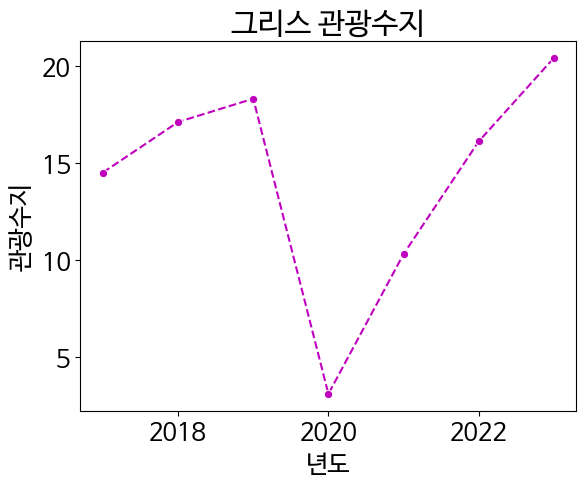

In [ ]:
pm=plus_list.loc['그리스',2017:2023]-minus_list.loc['그리스',2017:2023]

pm_line=sns.lineplot(x=pm.index,y=pm,marker='o',color='m',linestyle='--')
pm_line.set(xlabel='년도', ylabel='관광수지',title='그리스 관광수지')


[Text(0.5, 0, '년도'), Text(0, 0.5, '관광수지'), Text(0.5, 1.0, '태국 관광수지')]

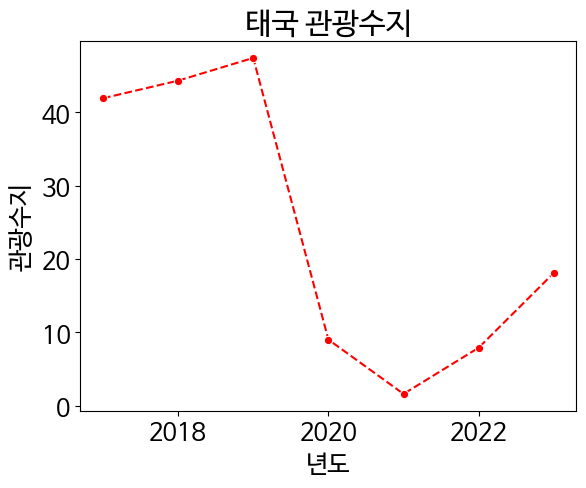

In [ ]:
pm=plus_list.loc['태국',2017:2023]-minus_list.loc['태국',2017:2023]

pm_line=sns.lineplot(x=pm.index,y=pm,marker='o',color='r',linestyle='--')
pm_line.set(xlabel='년도', ylabel='관광수지',title='태국 관광수지')

[Text(0.5, 0, '년도'), Text(0, 0.5, ''), Text(0.5, 1.0, '그리스 관광수지와 GDP')]

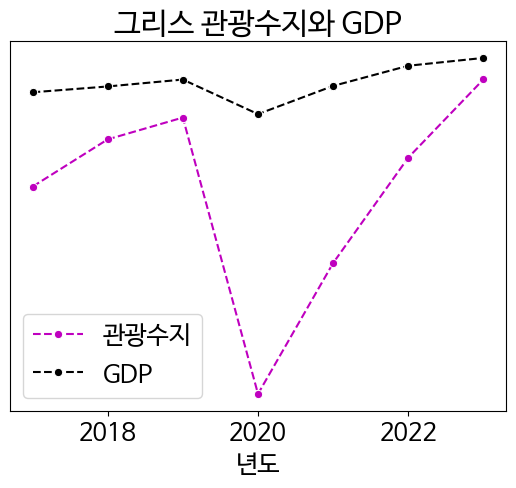

In [ ]:
pm=plus_list.loc['그리스',2017:2023]-minus_list.loc['그리스',2017:2023]
gdp=(gdp_list.loc['그리스',2017:2023]/10)

pm_line=sns.lineplot(x=pm.index,y=pm,marker='o',color='m',linestyle='--',label='관광수지')
pm_line=sns.lineplot(x=gdp.index,y=gdp,marker='o',color='black',linestyle='--',label='GDP')
plt.yticks([])
pm_line.set(xlabel='년도', ylabel='',title='그리스 관광수지와 GDP')


[Text(0.5, 0, '년도'), Text(0, 0.5, ''), Text(0.5, 1.0, '태국 관광수지와 GDP')]

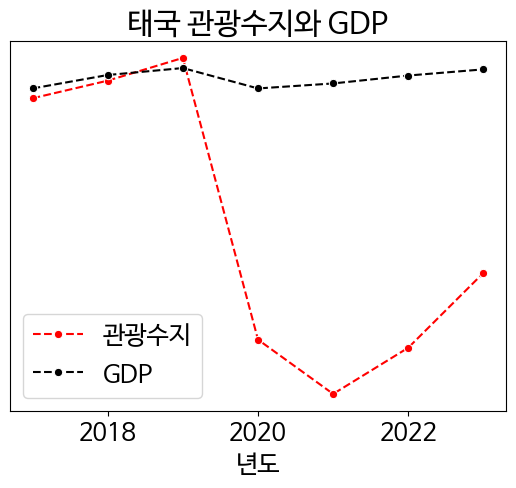

In [ ]:
pm=plus_list.loc['태국',2017:2023]-minus_list.loc['태국',2017:2023]
gdp=(gdp_list.loc['태국',2017:2023]/10)

pm_line=sns.lineplot(x=pm.index,y=pm,marker='o',color='r',linestyle='--',label='관광수지')
pm_line=sns.lineplot(x=gdp.index,y=gdp,marker='o',color='black',linestyle='--',label='GDP')
plt.yticks([])
pm_line.set(xlabel='년도', ylabel='',title='태국 관광수지와 GDP')

[Text(0.5, 0, '년도'), Text(0, 0.5, ''), Text(0.5, 1.0, '미국 관광수지와 GDP')]

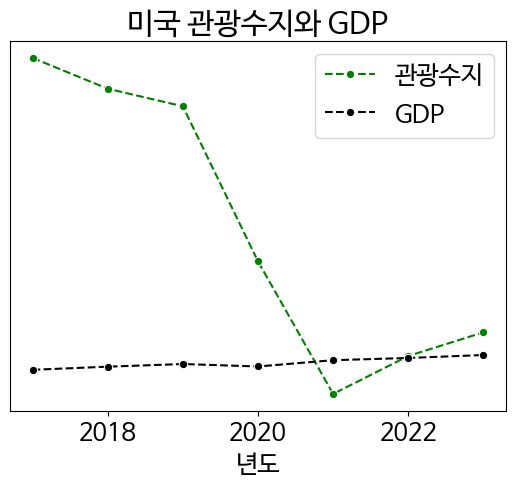

In [ ]:
pm=plus_list.loc['미국',2017:2023]-minus_list.loc['미국',2017:2023]
gdp=(gdp_list.loc['미국',2017:2023]/1000)

pm_line=sns.lineplot(x=pm.index,y=pm,marker='o',color='g',linestyle='--',label='관광수지')
pm_line=sns.lineplot(x=gdp.index,y=gdp,marker='o',color='black',linestyle='--',label='GDP')
plt.yticks([])
pm_line.set(xlabel='년도', ylabel='',title='미국 관광수지와 GDP')

[Text(0.5, 0, '년도'), Text(0, 0.5, ''), Text(0.5, 1.0, '한국 관광수지와 GDP')]

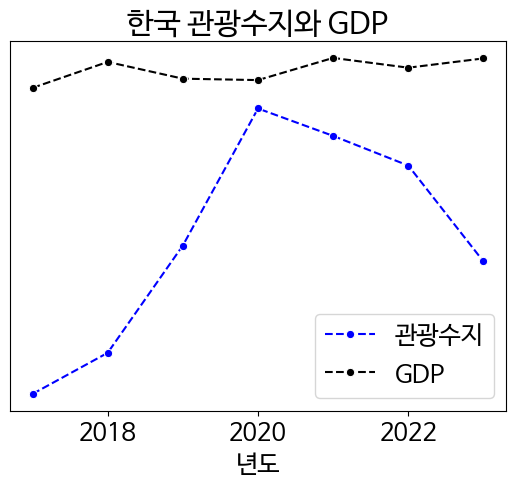

In [ ]:
pm=(plus_list.loc['대한민국',2017:2023]-minus_list.loc['대한민국',2017:2023])+22
gdp=(gdp_list.loc['대한민국',2017:2023]/100)

pm_line=sns.lineplot(x=pm.index,y=pm,marker='o',color='b',linestyle='--',label='관광수지')
pm_line=sns.lineplot(x=gdp.index,y=gdp,marker='o',color='black',linestyle='--',label='GDP')
plt.yticks([])
pm_line.set(xlabel='년도', ylabel='',title='한국 관광수지와 GDP')

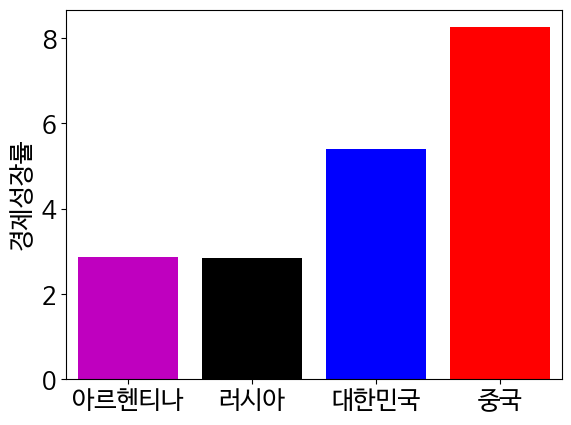

In [ ]:
#성장률 퍼센트 구하는 함수
def percent(previous, current):
    return ((current - previous) / previous) * 100
#사우디아라비아 러시아 인도네시아 이란 아르헨티나

sum=[0] * 4
for i,year in enumerate(gdp_list.columns):
  if(i>=1):
    sum[0]+=percent(gdp_list.loc['아르헨티나',year-1],gdp_list.loc['아르헨티나',year])
    sum[1]+=percent(gdp_list.loc['러시아',year-1],gdp_list.loc['러시아',year])
    sum[2]+=percent(gdp_list.loc['대한민국',year-1],gdp_list.loc['대한민국',year])
    sum[3]+=percent(gdp_list.loc['중국',year-1],gdp_list.loc['중국',year])

for i in range(4):
  sum[i]/=gdp_list.shape[1]-1

index=['아르헨티나','러시아','대한민국','중국']

barplot = sns.barplot(x=index,y=sum)
colors = ['m','black','blue','red']
plt.ylabel("경제성장률")
# 막대별 색상 변경
for bar, color in zip(barplot.patches, colors):
    bar.set_facecolor(color)


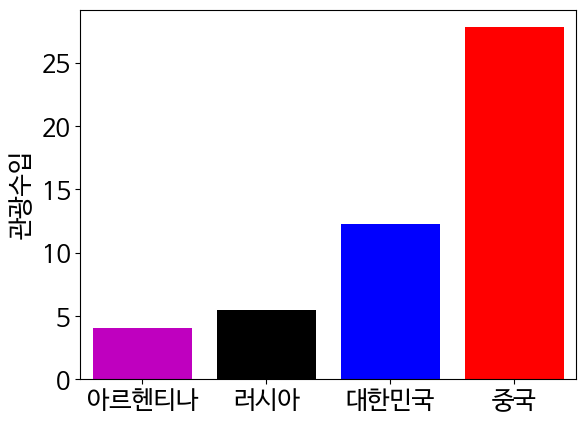

In [ ]:
sum[0]=plus_list.loc['아르헨티나'].sum()
sum[1]=plus_list.loc['러시아'].sum()
sum[2]=plus_list.loc['대한민국'].sum()
sum[3]=plus_list.loc['중국'].sum()

for i in range(4):
  sum[i]/=gdp_list.shape[1]-1

index=['아르헨티나','러시아','대한민국','중국']

barplot = sns.barplot(x=index,y=sum)
colors = ['m','black','blue','red']
plt.ylabel("관광수입")
# 막대별 색상 변경
for bar, color in zip(barplot.patches, colors):
    bar.set_facecolor(color)